**importing necessary libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets , models , layers
import matplotlib.pyplot as plt
import numpy as np

**Load the dataset**

In [ ]:
(X_train , y_train) , (X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)


In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[7]

'horse'

Let's plot some images to see what they are

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize = (16,3))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

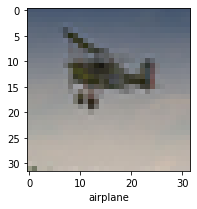

In [ ]:
plot_sample(X_train,y_train,373)

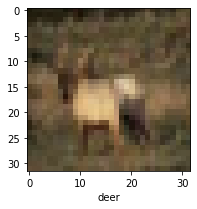

In [ ]:
plot_sample(X_train,y_train,3)

**Normalizing the training data**

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Building an ANN**

Let's first build an ANN and se how it performs

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 97s 61ms/step - loss: 1.8138 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.6246 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.5394 - accuracy: 0.4588
Epoch 4/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4815 - accuracy: 0.4769
Epoch 5/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.4331 - accuracy: 0.4952


We see that at the end of 5 epoch accuracy is somewhere around 49% , which is not very good

Let's print the classification report of this model

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.59      0.53      1000
           1       0.68      0.51      0.58      1000
           2       0.33      0.47      0.39      1000
           3       0.40      0.15      0.22      1000
           4       0.48      0.27      0.35      1000
           5       0.41      0.38      0.39      1000
           6       0.43      0.67      0.53      1000
           7       0.60      0.50      0.55      1000
           8       0.51      0.71      0.59      1000
           9       0.58      0.52      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



Now Let's build a CNN and see how it performs

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=33, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=61, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.6810 - accuracy: 0.3834
Epoch 2/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3509 - accuracy: 0.5192
Epoch 3/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2281 - accuracy: 0.5670
Epoch 4/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1474 - accuracy: 0.5958
Epoch 5/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0882 - accuracy: 0.6189


We can see that with the same number of epochs in ANN we got around 49% ad here in CNN we got around 62% and it's good on running for more number of epochs the change we will notice will be significant

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.1776 - accuracy: 0.5955


[1.1776046752929688, 0.5954999923706055]

**Let's now do some predictions**

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.7470388e-03, 7.3859654e-04, 7.0109707e-03, 7.1462953e-01,
        2.5752999e-03, 2.2300863e-01, 4.1191541e-02, 2.1529016e-03,
        4.4591734e-03, 2.4862546e-03],
       [5.1951911e-02, 5.5589730e-01, 2.2375914e-05, 3.5958560e-04,
        1.6409396e-05, 1.1702978e-05, 1.9060482e-05, 1.3279713e-05,
        3.4015340e-01, 5.1554933e-02],
       [2.2156019e-02, 4.3990254e-01, 1.6529250e-03, 1.7386306e-02,
        1.7661760e-03, 3.9003899e-03, 6.0338732e-03, 9.2185673e-04,
        2.2918329e-01, 2.7709660e-01],
       [4.7308084e-01, 1.7503582e-02, 7.9682898e-03, 8.2271202e-03,
        1.4438504e-02, 3.2518167e-04, 5.8578798e-03, 1.1202724e-03,
        4.6411139e-01, 7.3669120e-03],
       [4.4605516e-05, 2.1363939e-04, 1.9223470e-02, 1.8026091e-02,
        4.9056622e-01, 7.6136291e-03, 4.6300885e-01, 1.2226988e-03,
        5.7609435e-05, 2.3185261e-05]], dtype=float32)

Here we are taking the maxx out of the y_pred and giving it to a class

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

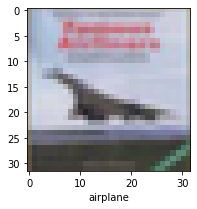

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

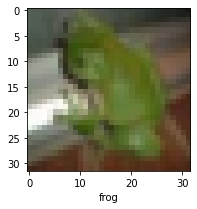

In [ ]:
plot_sample(X_test, y_test,7)

In [ ]:
classes[y_classes[7]]

'frog'

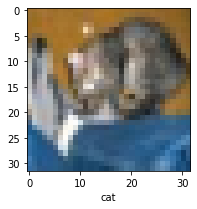

In [ ]:
plot_sample(X_test, y_test,0)

In [ ]:
classes[y_classes[0]]

'cat'

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.50      0.61      1000
           1       0.70      0.76      0.73      1000
           2       0.73      0.21      0.33      1000
           3       0.41      0.37      0.39      1000
           4       0.50      0.61      0.55      1000
           5       0.44      0.69      0.54      1000
           6       0.62      0.80      0.70      1000
           7       0.61      0.65      0.63      1000
           8       0.75      0.65      0.69      1000
           9       0.66      0.70      0.68      1000

    accuracy                           0.60     10000
   macro avg       0.62      0.60      0.59     10000
weighted avg       0.62      0.60      0.59     10000

